In [1]:
#I have 3 list of songs: 1:best_songs, 2:favorite_songs, 3:final_df 
#If your song is in 
#You can enter a songs name, 

In [2]:
# 1. import libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import pprint
import config
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [4]:
from IPython.display import IFrame

In [5]:
!pip install fuzzywuzzy

from fuzzywuzzy import fuzz, process

/Users/hana/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [6]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [7]:
playlists = ['Latin','R&B', 'Love','Anime', 'Trending','Jazz', 'Metal', 'Party', 'Focus', 'Chill', 'Mood', 'Pop']
len(playlists)

12

In [8]:
def get_playlist_ids(playlists):
    ids = []

    def get_playlist_id(playlist):
        pl = sp.search(playlist, type="playlist")
        pl_id = pl["playlists"]["items"][0]["id"]
        return pl_id

    for playlist in playlists:
        ids.append(get_playlist_id(playlist))

    return ids

In [9]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [10]:
def get_df_for_playlist(username, playlist_id):
    # Get playlist tracks
    playlist_tracks = get_playlist_tracks(username, playlist_id)

    # Extract track IDs
    track_ids = [track['track']['id'] for track in playlist_tracks]
    
    chunk_size = 100
    track_ids_chopped = [track_ids[i:i+chunk_size] for i in range(0,len(track_ids),chunk_size)]
    # Get audio features

    af_list = []
    for chunk in track_ids_chopped:
        af_list.extend(sp.audio_features(chunk))
        
    af_df = pd.DataFrame(af_list)
   

    return af_df

In [11]:
get_playlist_ids(playlists)

['37i9dQZF1EIcEtgFFzwTI9',
 '37i9dQZF1EQoqCH7BwIYb7',
 '0whWWNcAlFitbHMFFUIIyp',
 '1YA5cPIfDy3L03bGnNiDM7',
 '5JNNpb0q7ZIM3s3j355Anr',
 '37i9dQZF1DXbITWG1ZJKYt',
 '37i9dQZF1EQpgT26jgbgRI',
 '5xS3Gi0fA3Uo6RScucyct6',
 '5iMPQNcuMfYlWNRNUllc2o',
 '37i9dQZF1EVHGWrwldPRtj',
 '37i9dQZF1EVKuMoAJjoTIw',
 '37i9dQZF1EQncLwOalG3K7']

In [12]:
get_playlist_tracks("Spotify", '37i9dQZF1EQmK1rjZuPGDt')
Latin_df = get_df_for_playlist("Spotify", '37i9dQZF1EQmK1rjZuPGDt')
Latin_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,audio_features,05WVKTdZhlIMX4qqMLuo0f,spotify:track:05WVKTdZhlIMX4qqMLuo0f,https://api.spotify.com/v1/tracks/05WVKTdZhlIM...,https://api.spotify.com/v1/audio-analysis/05WV...,197333,4
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,audio_features,2HafqoJbgXdtjwCOvNEF14,spotify:track:2HafqoJbgXdtjwCOvNEF14,https://api.spotify.com/v1/tracks/2HafqoJbgXdt...,https://api.spotify.com/v1/audio-analysis/2Haf...,184061,4
3,0.708,0.737,1,-4.045,1,0.0436,0.07390,0.001620,0.0955,0.607,91.986,audio_features,7ABLbnD53cQK00mhcaOUVG,spotify:track:7ABLbnD53cQK00mhcaOUVG,https://api.spotify.com/v1/tracks/7ABLbnD53cQK...,https://api.spotify.com/v1/audio-analysis/7ABL...,197920,4
4,0.327,0.941,1,-3.294,1,0.3530,0.02310,0.000000,0.0636,0.707,129.738,audio_features,6ku3i5WNrsY3qhOq6ua9TL,spotify:track:6ku3i5WNrsY3qhOq6ua9TL,https://api.spotify.com/v1/tracks/6ku3i5WNrsY3...,https://api.spotify.com/v1/audio-analysis/6ku3...,199236,4
5,0.628,0.690,8,-5.830,1,0.0511,0.44300,0.000000,0.1130,0.660,179.908,audio_features,7qCAVkHWZkF44OzOUKf8Cr,spotify:track:7qCAVkHWZkF44OzOUKf8Cr,https://api.spotify.com/v1/tracks/7qCAVkHWZkF4...,https://api.spotify.com/v1/audio-analysis/7qCA...,205907,4
6,0.733,0.897,0,-3.652,1,0.0389,0.03910,0.000000,0.1170,0.649,96.006,audio_features,0mlAOSILGRys2IbvyOT5VJ,spotify:track:0mlAOSILGRys2IbvyOT5VJ,https://api.spotify.com/v1/tracks/0mlAOSILGRys...,https://api.spotify.com/v1/audio-analysis/0mlA...,173800,4
7,0.548,0.704,11,-4.838,0,0.0777,0.01680,0.000023,0.1430,0.288,104.666,audio_features,7COfe3P7KgfwDwIRB8LIDw,spotify:track:7COfe3P7KgfwDwIRB8LIDw,https://api.spotify.com/v1/tracks/7COfe3P7Kgfw...,https://api.spotify.com/v1/audio-analysis/7COf...,185040,4
8,0.814,0.813,2,-3.023,0,0.0561,0.03000,0.000093,0.2550,0.839,79.997,audio_features,6Za3190Sbw39BBC77WSS1C,spotify:track:6Za3190Sbw39BBC77WSS1C,https://api.spotify.com/v1/tracks/6Za3190Sbw39...,https://api.spotify.com/v1/audio-analysis/6Za3...,232550,4
9,0.852,0.797,0,-6.543,1,0.0614,0.32200,0.000003,0.0845,0.741,96.008,audio_features,228BxWXUYQPJrJYHDLOHkj,spotify:track:228BxWXUYQPJrJYHDLOHkj,https://api.spotify.com/v1/tracks/228BxWXUYQPJ...,https://api.spotify.com/v1/audio-analysis/228B...,192600,4


In [13]:
get_playlist_tracks("Spotify", '37i9dQZF1EQoqCH7BwIYb7')
RnB_df = get_df_for_playlist("Spotify", '37i9dQZF1EQoqCH7BwIYb7')
RnB_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.684,0.607,11,-8.127,0,0.1000,0.02670,0.000307,0.1910,0.4980,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4
1,0.595,0.678,9,-5.180,1,0.0335,0.01990,0.003890,0.4180,0.2590,117.067,audio_features,5fEB6ZmVkg63GZg9qO86jh,spotify:track:5fEB6ZmVkg63GZg9qO86jh,https://api.spotify.com/v1/tracks/5fEB6ZmVkg63...,https://api.spotify.com/v1/audio-analysis/5fEB...,99213,4
2,0.785,0.470,7,-6.420,0,0.0329,0.13700,0.000001,0.1310,0.0569,120.006,audio_features,0WIv5qV41y6YjjB9V1biuC,spotify:track:0WIv5qV41y6YjjB9V1biuC,https://api.spotify.com/v1/tracks/0WIv5qV41y6Y...,https://api.spotify.com/v1/audio-analysis/0WIv...,188000,4
3,0.710,0.797,4,-3.006,0,0.0582,0.40800,0.000000,0.1600,0.8490,94.998,audio_features,6pWzCKTrKrwbUPzY8RLCoP,spotify:track:6pWzCKTrKrwbUPzY8RLCoP,https://api.spotify.com/v1/tracks/6pWzCKTrKrwb...,https://api.spotify.com/v1/audio-analysis/6pWz...,209120,4
4,0.767,0.551,0,-7.328,1,0.0616,0.00364,0.000000,0.0451,0.7960,100.904,audio_features,7MQywXGHEev7JmwwIzMcao,spotify:track:7MQywXGHEev7JmwwIzMcao,https://api.spotify.com/v1/tracks/7MQywXGHEev7...,https://api.spotify.com/v1/audio-analysis/7MQy...,275707,4
5,0.569,0.596,8,-6.486,1,0.1720,0.45200,0.000079,0.2050,0.7540,93.135,audio_features,4iuNZTcvT9diFySSzVsnVS,spotify:track:4iuNZTcvT9diFySSzVsnVS,https://api.spotify.com/v1/tracks/4iuNZTcvT9di...,https://api.spotify.com/v1/audio-analysis/4iuN...,217347,4
6,0.808,0.721,1,-5.165,1,0.2130,0.19700,0.000000,0.2050,0.7730,94.955,audio_features,538hPQNtP190KcS3ZnWY5M,spotify:track:538hPQNtP190KcS3ZnWY5M,https://api.spotify.com/v1/tracks/538hPQNtP190...,https://api.spotify.com/v1/audio-analysis/538h...,238360,4
7,0.741,0.508,11,-5.099,0,0.0507,0.03470,0.000064,0.0602,0.3540,121.965,audio_features,6gdhHMWUv1pvkOHqCUGvCp,spotify:track:6gdhHMWUv1pvkOHqCUGvCp,https://api.spotify.com/v1/tracks/6gdhHMWUv1pv...,https://api.spotify.com/v1/audio-analysis/6gdh...,270760,4
8,0.651,0.527,5,-8.586,0,0.1780,0.55600,0.000000,0.2090,0.4960,78.927,audio_features,0FPuNzimOamZvt7ysiP7Pt,spotify:track:0FPuNzimOamZvt7ysiP7Pt,https://api.spotify.com/v1/tracks/0FPuNzimOamZ...,https://api.spotify.com/v1/audio-analysis/0FPu...,246107,4
9,0.699,0.388,6,-10.722,1,0.0531,0.58900,0.000002,0.0658,0.5660,125.861,audio_features,4TVTbdNZtCJEhibH231GxQ,spotify:track:4TVTbdNZtCJEhibH231GxQ,https://api.spotify.com/v1/tracks/4TVTbdNZtCJE...,https://api.spotify.com/v1/audio-analysis/4TVT...,274667,4


In [14]:
get_playlist_tracks("Spotify", '0whWWNcAlFitbHMFFUIIyp')
Love_df = get_df_for_playlist("Spotify", '0whWWNcAlFitbHMFFUIIyp')
Love_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.673,0.523,2,-4.195,0,0.0293,0.0834,0,0.124,0.294,116.850,audio_features,2Mmid8aKghvsPgaQIFMrPJ,spotify:track:2Mmid8aKghvsPgaQIFMrPJ,https://api.spotify.com/v1/tracks/2Mmid8aKghvs...,https://api.spotify.com/v1/audio-analysis/2Mmi...,255333,4
1,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,11da2dMQkeFZixxHZJYs6m,spotify:track:11da2dMQkeFZixxHZJYs6m,https://api.spotify.com/v1/tracks/11da2dMQkeFZ...,https://api.spotify.com/v1/audio-analysis/11da...,255173,4
2,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,6jXEyDzSfzZ68ZpsMcmOj1,spotify:track:6jXEyDzSfzZ68ZpsMcmOj1,https://api.spotify.com/v1/tracks/6jXEyDzSfzZ6...,https://api.spotify.com/v1/audio-analysis/6jXE...,255173,4
3,0.688,0.519,5,-4.285,1,0.0283,0.0640,0,0.100,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4
4,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,4SbyspTyB4sHhpOcTLgawJ,spotify:track:4SbyspTyB4sHhpOcTLgawJ,https://api.spotify.com/v1/tracks/4SbyspTyB4sH...,https://api.spotify.com/v1/audio-analysis/4Sby...,255173,4
5,0.688,0.519,5,-4.285,1,0.0283,0.0640,0,0.100,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4
6,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,08gmGkTgzLbGiNUWSLUs5B,spotify:track:08gmGkTgzLbGiNUWSLUs5B,https://api.spotify.com/v1/tracks/08gmGkTgzLbG...,https://api.spotify.com/v1/audio-analysis/08gm...,255173,4
7,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,4hl1CDoqvimmDGUNbOR8AA,spotify:track:4hl1CDoqvimmDGUNbOR8AA,https://api.spotify.com/v1/tracks/4hl1CDoqvimm...,https://api.spotify.com/v1/audio-analysis/4hl1...,255173,4
8,0.688,0.519,5,-4.285,1,0.0283,0.0640,0,0.100,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4
9,0.688,0.519,5,-4.285,1,0.0283,0.0640,0,0.100,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4


In [15]:
get_playlist_tracks("Spotify", '1YA5cPIfDy3L03bGnNiDM7')
Anime_df = get_df_for_playlist("Spotify", '1YA5cPIfDy3L03bGnNiDM7')
Anime_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.577,0.941,1,-5.170,1,0.1050,0.002070,0.000003,0.0891,0.292,101.921,audio_features,3khEEPRyBeOUabbmOPJzAG,spotify:track:3khEEPRyBeOUabbmOPJzAG,https://api.spotify.com/v1/tracks/3khEEPRyBeOU...,https://api.spotify.com/v1/audio-analysis/3khE...,193495,4
1,0.536,0.966,6,-2.929,0,0.0558,0.121000,0.000000,0.0477,0.849,152.076,audio_features,2XpV9sHBexcNrz0Gyf3l18,spotify:track:2XpV9sHBexcNrz0Gyf3l18,https://api.spotify.com/v1/tracks/2XpV9sHBexcN...,https://api.spotify.com/v1/audio-analysis/2XpV...,215707,4
2,0.566,0.850,6,-4.431,0,0.0599,0.066300,0.000000,0.3190,0.722,117.048,audio_features,0GWNtMohuYUEHVZ40tcnHF,spotify:track:0GWNtMohuYUEHVZ40tcnHF,https://api.spotify.com/v1/tracks/0GWNtMohuYUE...,https://api.spotify.com/v1/audio-analysis/0GWN...,238987,4
3,0.541,0.977,4,-2.828,0,0.1570,0.003210,0.000051,0.0796,0.263,134.938,audio_features,0qMip0B2D4ePEjBJvAtYre,spotify:track:0qMip0B2D4ePEjBJvAtYre,https://api.spotify.com/v1/tracks/0qMip0B2D4eP...,https://api.spotify.com/v1/audio-analysis/0qMi...,237587,4
4,0.508,0.889,7,-2.755,0,0.0862,0.049500,0.000000,0.0984,0.332,135.014,audio_features,1rN9QoVxw5U7TJkyaUR8C1,spotify:track:1rN9QoVxw5U7TJkyaUR8C1,https://api.spotify.com/v1/tracks/1rN9QoVxw5U7...,https://api.spotify.com/v1/audio-analysis/1rN9...,238360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.612,0.259,11,-11.096,0,0.0999,0.196000,0.901000,0.1060,0.214,149.957,audio_features,4k3bQolPVSky3itPqhsrlY,spotify:track:4k3bQolPVSky3itPqhsrlY,https://api.spotify.com/v1/tracks/4k3bQolPVSky...,https://api.spotify.com/v1/audio-analysis/4k3b...,105617,4
122,0.466,0.948,5,-4.139,1,0.1650,0.014000,0.000000,0.1080,0.288,92.124,audio_features,1a1b22lYmn0y5YPJUGFCqb,spotify:track:1a1b22lYmn0y5YPJUGFCqb,https://api.spotify.com/v1/tracks/1a1b22lYmn0y...,https://api.spotify.com/v1/audio-analysis/1a1b...,183680,4
123,0.634,0.188,6,-18.921,0,0.0419,0.595000,0.895000,0.1110,0.387,75.004,audio_features,4zQ4d7cQk1aMBD7P3cuiBo,spotify:track:4zQ4d7cQk1aMBD7P3cuiBo,https://api.spotify.com/v1/tracks/4zQ4d7cQk1aM...,https://api.spotify.com/v1/audio-analysis/4zQ4...,86417,4
124,0.656,0.396,2,-14.751,1,0.0367,0.159000,0.730000,0.1240,0.225,74.985,audio_features,5oXjsCnKEM3Y1I4BaFduWW,spotify:track:5oXjsCnKEM3Y1I4BaFduWW,https://api.spotify.com/v1/tracks/5oXjsCnKEM3Y...,https://api.spotify.com/v1/audio-analysis/5oXj...,102808,4


In [16]:
get_playlist_tracks("Spotify", '5JNNpb0q7ZIM3s3j355Anr')
Trending_df =get_df_for_playlist("Spotify", '5JNNpb0q7ZIM3s3j355Anr')
Trending_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.788,0.758,1,-6.513,1,0.0505,0.19800,0.000085,0.1040,0.823,119.008,audio_features,7gaA3wERFkFkgivjwbSvkG,spotify:track:7gaA3wERFkFkgivjwbSvkG,https://api.spotify.com/v1/tracks/7gaA3wERFkFk...,https://api.spotify.com/v1/audio-analysis/7gaA...,214994,4
1,0.725,0.709,2,-6.514,1,0.0720,0.58800,0.000000,0.1350,0.353,110.024,audio_features,0Z7nGFVCLfixWctgePsRk9,spotify:track:0Z7nGFVCLfixWctgePsRk9,https://api.spotify.com/v1/tracks/0Z7nGFVCLfix...,https://api.spotify.com/v1/audio-analysis/0Z7n...,235636,4
2,0.575,0.369,8,-10.444,1,0.1110,0.00724,0.000001,0.6910,0.541,128.815,audio_features,4tdWPKCdZPoDf1SgCLmLNR,spotify:track:4tdWPKCdZPoDf1SgCLmLNR,https://api.spotify.com/v1/tracks/4tdWPKCdZPoD...,https://api.spotify.com/v1/audio-analysis/4tdW...,200597,3
3,0.423,0.379,9,-10.307,1,0.0371,0.12500,0.020100,0.3860,0.161,138.015,audio_features,0tPBEubMql50F2aof3YW7e,spotify:track:0tPBEubMql50F2aof3YW7e,https://api.spotify.com/v1/tracks/0tPBEubMql50...,https://api.spotify.com/v1/audio-analysis/0tPB...,160460,4
4,0.595,0.529,0,-8.104,1,0.0280,0.37700,0.000000,0.1080,0.547,126.971,audio_features,0FhTPDkJYtPbO8Jx8stmKC,spotify:track:0FhTPDkJYtPbO8Jx8stmKC,https://api.spotify.com/v1/tracks/0FhTPDkJYtPb...,https://api.spotify.com/v1/audio-analysis/0FhT...,199720,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.576,0.776,3,-5.678,1,0.0660,0.11400,0.000000,0.3330,0.596,107.943,audio_features,0LMwmV37RCmBO2so0szAFs,spotify:track:0LMwmV37RCmBO2so0szAFs,https://api.spotify.com/v1/tracks/0LMwmV37RCmB...,https://api.spotify.com/v1/audio-analysis/0LMw...,178273,4
63,0.627,0.879,9,-3.446,1,0.0955,0.00193,0.000007,0.0647,0.748,129.979,audio_features,3IX0yuEVvDbnqUwMBB3ouC,spotify:track:3IX0yuEVvDbnqUwMBB3ouC,https://api.spotify.com/v1/tracks/3IX0yuEVvDbn...,https://api.spotify.com/v1/audio-analysis/3IX0...,184784,4
64,0.740,0.697,8,-4.912,1,0.0340,0.02680,0.000000,0.2240,0.732,138.992,audio_features,6dgUya35uo964z7GZXM07g,spotify:track:6dgUya35uo964z7GZXM07g,https://api.spotify.com/v1/tracks/6dgUya35uo96...,https://api.spotify.com/v1/audio-analysis/6dgU...,163648,4
65,0.783,0.592,11,-8.332,0,0.0331,0.43500,0.000004,0.3470,0.726,120.018,audio_features,739WUU1tPFLO4x4HJq561K,spotify:track:739WUU1tPFLO4x4HJq561K,https://api.spotify.com/v1/tracks/739WUU1tPFLO...,https://api.spotify.com/v1/audio-analysis/739W...,174253,4


In [17]:
get_playlist_tracks("Spotify", '37i9dQZF1DXbITWG1ZJKYt')
Jazz_df = get_df_for_playlist("Spotify", '37i9dQZF1DXbITWG1ZJKYt')
Jazz_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.271,0.1650,5,-20.652,1,0.0351,0.729,0.000002,0.1180,0.203,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4
1,0.349,0.1820,5,-13.507,1,0.0310,0.920,0.015200,0.1430,0.178,136.094,audio_features,648TTtYB0bH0P8Hfy0FmkL,spotify:track:648TTtYB0bH0P8Hfy0FmkL,https://api.spotify.com/v1/tracks/648TTtYB0bH0...,https://api.spotify.com/v1/audio-analysis/648T...,191973,3
2,0.747,0.2430,4,-15.134,0,0.1240,0.829,0.000001,0.0905,0.426,118.661,audio_features,5Lhjlnly9Ynhf52ojQS534,spotify:track:5Lhjlnly9Ynhf52ojQS534,https://api.spotify.com/v1/tracks/5Lhjlnly9Ynh...,https://api.spotify.com/v1/audio-analysis/5Lhj...,215747,4
3,0.454,0.2600,8,-13.193,0,0.0401,0.539,0.000780,0.0675,0.598,174.322,audio_features,1YQWosTIljIvxAgHWTp7KP,spotify:track:1YQWosTIljIvxAgHWTp7KP,https://api.spotify.com/v1/tracks/1YQWosTIljIv...,https://api.spotify.com/v1/audio-analysis/1YQW...,324133,5
4,0.262,0.3560,0,-8.031,0,0.0303,0.613,0.000000,0.1750,0.426,174.176,audio_features,2IdwQxhJn9ZE4zIotcCefR,spotify:track:2IdwQxhJn9ZE4zIotcCefR,https://api.spotify.com/v1/tracks/2IdwQxhJn9ZE...,https://api.spotify.com/v1/audio-analysis/2Idw...,187667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.458,0.1550,10,-17.853,1,0.0405,0.908,0.621000,0.2990,0.276,126.281,audio_features,2bPeAxNC1S1C359ds8Tw3X,spotify:track:2bPeAxNC1S1C359ds8Tw3X,https://api.spotify.com/v1/tracks/2bPeAxNC1S1C...,https://api.spotify.com/v1/audio-analysis/2bPe...,526893,4
246,0.649,0.2710,5,-15.198,0,0.0498,0.708,0.000005,0.1240,0.626,126.026,audio_features,4jCoxXaEKeTWkQ7HL1d5de,spotify:track:4jCoxXaEKeTWkQ7HL1d5de,https://api.spotify.com/v1/tracks/4jCoxXaEKeTW...,https://api.spotify.com/v1/audio-analysis/4jCo...,441027,4
247,0.350,0.6070,5,-11.141,0,0.0498,0.794,0.446000,0.1160,0.597,187.101,audio_features,1QlTNF43OyKK9BorIRsJ8o,spotify:track:1QlTNF43OyKK9BorIRsJ8o,https://api.spotify.com/v1/tracks/1QlTNF43OyKK...,https://api.spotify.com/v1/audio-analysis/1QlT...,422640,4
248,0.355,0.1520,5,-14.864,0,0.0401,0.924,0.077100,0.1260,0.145,65.215,audio_features,6x8XKDM8Rnid4TyOUg9kj3,spotify:track:6x8XKDM8Rnid4TyOUg9kj3,https://api.spotify.com/v1/tracks/6x8XKDM8Rnid...,https://api.spotify.com/v1/audio-analysis/6x8X...,320773,4


In [18]:
get_playlist_tracks("Spotify", '37i9dQZF1EQpgT26jgbgRI')
Metal_df = get_df_for_playlist("Spotify", '37i9dQZF1EQpgT26jgbgRI')
Metal_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.521,0.895,7,-5.242,1,0.0442,0.000055,0.349000,0.0985,0.2370,120.117,audio_features,2bPGTMB5sFfFYQ2YvSmup0,spotify:track:2bPGTMB5sFfFYQ2YvSmup0,https://api.spotify.com/v1/tracks/2bPGTMB5sFfF...,https://api.spotify.com/v1/audio-analysis/2bPG...,322340,4
1,0.469,0.713,0,-5.619,0,0.0461,0.086900,0.000188,0.1290,0.2670,154.994,audio_features,6tRneEcItwpSxBtqgem5Dr,spotify:track:6tRneEcItwpSxBtqgem5Dr,https://api.spotify.com/v1/tracks/6tRneEcItwpS...,https://api.spotify.com/v1/audio-analysis/6tRn...,241499,4
2,0.687,0.677,2,-4.172,1,0.0508,0.000643,0.000137,0.0564,0.5450,75.052,audio_features,3o7TMr6RmIusYH7Kkg7ujR,spotify:track:3o7TMr6RmIusYH7Kkg7ujR,https://api.spotify.com/v1/tracks/3o7TMr6RmIus...,https://api.spotify.com/v1/audio-analysis/3o7T...,199773,4
3,0.435,0.987,1,-4.667,0,0.1600,0.000195,0.084700,0.2680,0.1010,103.160,audio_features,0L7zm6afBEtrNKo6C6Gj08,spotify:track:0L7zm6afBEtrNKo6C6Gj08,https://api.spotify.com/v1/tracks/0L7zm6afBEtr...,https://api.spotify.com/v1/audio-analysis/0L7z...,365827,4
4,0.272,0.747,5,-4.860,0,0.0401,0.000393,0.000040,0.1600,0.2550,202.777,audio_features,6olS0TmHmsGr0hXtcBsiVM,spotify:track:6olS0TmHmsGr0hXtcBsiVM,https://api.spotify.com/v1/tracks/6olS0TmHmsGr...,https://api.spotify.com/v1/audio-analysis/6olS...,262133,4
5,0.313,0.882,0,-6.215,1,0.0355,0.034600,0.338000,0.4500,0.3000,103.981,audio_features,469rBLYJUZHMJLtq2Wch3h,spotify:track:469rBLYJUZHMJLtq2Wch3h,https://api.spotify.com/v1/tracks/469rBLYJUZHM...,https://api.spotify.com/v1/audio-analysis/469r...,431093,4
6,0.512,0.996,2,-2.100,1,0.1140,0.000056,0.000167,0.3470,0.0601,130.931,audio_features,04EtBLFIxbcVt9NdYgcrpF,spotify:track:04EtBLFIxbcVt9NdYgcrpF,https://api.spotify.com/v1/tracks/04EtBLFIxbcV...,https://api.spotify.com/v1/audio-analysis/04Et...,220880,4
7,0.633,0.846,7,-6.347,1,0.0337,0.000819,0.001390,0.0762,0.4480,89.230,audio_features,1PhLYngBKbeDtdmDzCg3Pb,spotify:track:1PhLYngBKbeDtdmDzCg3Pb,https://api.spotify.com/v1/tracks/1PhLYngBKbeD...,https://api.spotify.com/v1/audio-analysis/1PhL...,323933,4
8,0.362,0.961,2,-5.664,1,0.0857,0.024000,0.000009,0.1590,0.4910,164.019,audio_features,2RaA6kIcvomt77qlIgGhCT,spotify:track:2RaA6kIcvomt77qlIgGhCT,https://api.spotify.com/v1/tracks/2RaA6kIcvomt...,https://api.spotify.com/v1/audio-analysis/2RaA...,153840,4
9,0.274,0.726,9,-11.541,1,0.0449,0.000212,0.011300,0.0993,0.4260,146.449,audio_features,4vJr55lngvhSM8WIh9CjQc,spotify:track:4vJr55lngvhSM8WIh9CjQc,https://api.spotify.com/v1/tracks/4vJr55lngvhS...,https://api.spotify.com/v1/audio-analysis/4vJr...,422933,4


In [19]:
get_playlist_tracks("Spotify", '5xS3Gi0fA3Uo6RScucyct6')
Party_df = get_df_for_playlist("Spotify", '5xS3Gi0fA3Uo6RScucyct6')
Party_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.435,0.837,3,-8.126,1,0.4490,0.00676,0.000000,0.1170,0.778,124.913,audio_features,5AyL2kgLtTWEu3qO3B9SqK,spotify:track:5AyL2kgLtTWEu3qO3B9SqK,https://api.spotify.com/v1/tracks/5AyL2kgLtTWE...,https://api.spotify.com/v1/audio-analysis/5AyL...,216893,4
1,0.825,0.856,1,-1.912,1,0.0476,0.00851,0.000001,0.1270,0.207,128.016,audio_features,1V4jC0vJ5525lEF1bFgPX2,spotify:track:1V4jC0vJ5525lEF1bFgPX2,https://api.spotify.com/v1/tracks/1V4jC0vJ5525...,https://api.spotify.com/v1/audio-analysis/1V4j...,222133,4
2,0.747,0.716,11,-2.457,0,0.0750,0.13500,0.000000,0.2510,0.751,125.008,audio_features,2EBCVPNAG46nbgs6jXPGvv,spotify:track:2EBCVPNAG46nbgs6jXPGvv,https://api.spotify.com/v1/tracks/2EBCVPNAG46n...,https://api.spotify.com/v1/audio-analysis/2EBC...,210627,4
3,0.706,0.890,1,-4.444,0,0.0688,0.05880,0.002860,0.3060,0.684,128.011,audio_features,2LEF1A8DOZ9wRYikWgVlZ8,spotify:track:2LEF1A8DOZ9wRYikWgVlZ8,https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...,https://api.spotify.com/v1/audio-analysis/2LEF...,248133,4
4,0.761,0.933,10,-5.380,1,0.0560,0.09080,0.000085,0.0607,0.836,122.959,audio_features,4Y7XAxTANhu3lmnLAzhWJW,spotify:track:4Y7XAxTANhu3lmnLAzhWJW,https://api.spotify.com/v1/tracks/4Y7XAxTANhu3...,https://api.spotify.com/v1/audio-analysis/4Y7X...,236200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.671,0.876,7,-5.681,0,0.0352,0.12000,0.188000,0.0823,0.964,129.998,audio_features,23RoR84KodL5HWvUTneQ1w,spotify:track:23RoR84KodL5HWvUTneQ1w,https://api.spotify.com/v1/tracks/23RoR84KodL5...,https://api.spotify.com/v1/audio-analysis/23Ro...,231545,4
146,0.646,0.823,2,-4.123,0,0.0394,0.21300,0.000000,0.3220,0.418,128.035,audio_features,7MmG8p0F9N3C4AXdK6o6Eb,spotify:track:7MmG8p0F9N3C4AXdK6o6Eb,https://api.spotify.com/v1/tracks/7MmG8p0F9N3C...,https://api.spotify.com/v1/audio-analysis/7MmG...,227267,4
147,0.842,0.868,11,-6.241,1,0.0635,0.00105,0.268000,0.3920,0.642,125.011,audio_features,0FivldhIlhJzhbG1E7dbFn,spotify:track:0FivldhIlhJzhbG1E7dbFn,https://api.spotify.com/v1/tracks/0FivldhIlhJz...,https://api.spotify.com/v1/audio-analysis/0Fiv...,178560,4
148,0.695,0.869,8,-5.066,1,0.0483,0.41000,0.000000,0.2370,0.580,124.989,audio_features,05SBRd4fXgn8FX7bf8BCAE,spotify:track:05SBRd4fXgn8FX7bf8BCAE,https://api.spotify.com/v1/tracks/05SBRd4fXgn8...,https://api.spotify.com/v1/audio-analysis/05SB...,234507,4


In [20]:
get_playlist_tracks("Spotify", '37i9dQZF1DWZeKCadgRdKQ')
Focus_df = get_df_for_playlist("Spotify", '37i9dQZF1DWZeKCadgRdKQ')
Focus_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.587,0.06140,9,-22.387,0,0.0484,0.981,0.894,0.1120,0.3990,75.041,audio_features,1ELJ66txni1o86RVvdcgHb,spotify:track:1ELJ66txni1o86RVvdcgHb,https://api.spotify.com/v1/tracks/1ELJ66txni1o...,https://api.spotify.com/v1/audio-analysis/1ELJ...,156067,4
1,0.599,0.11400,4,-20.061,1,0.0399,0.966,0.917,0.1090,0.0553,79.979,audio_features,2MveOWtavb89Lk09bcPoi8,spotify:track:2MveOWtavb89Lk09bcPoi8,https://api.spotify.com/v1/tracks/2MveOWtavb89...,https://api.spotify.com/v1/audio-analysis/2Mve...,129187,4
2,0.297,0.04610,0,-20.517,0,0.0336,0.910,0.895,0.1120,0.0927,73.838,audio_features,1HsNwZPWvrN8gZ44YnjOCo,spotify:track:1HsNwZPWvrN8gZ44YnjOCo,https://api.spotify.com/v1/tracks/1HsNwZPWvrN8...,https://api.spotify.com/v1/audio-analysis/1HsN...,126506,4
3,0.577,0.07210,2,-22.973,1,0.0317,0.981,0.898,0.1110,0.2420,73.998,audio_features,6zTbtySCRStJOv5xA4XvRE,spotify:track:6zTbtySCRStJOv5xA4XvRE,https://api.spotify.com/v1/tracks/6zTbtySCRStJ...,https://api.spotify.com/v1/audio-analysis/6zTb...,151917,4
4,0.467,0.24300,11,-22.534,1,0.0332,0.842,0.947,0.1150,0.0541,75.031,audio_features,6cr9XbO2yAJgTNa6XNRINF,spotify:track:6cr9XbO2yAJgTNa6XNRINF,https://api.spotify.com/v1/tracks/6cr9XbO2yAJg...,https://api.spotify.com/v1/audio-analysis/6cr9...,158000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.268,0.02340,0,-27.141,1,0.0487,0.995,0.929,0.0975,0.0382,99.734,audio_features,6oJIMUBDopuFljMNBFrq9Z,spotify:track:6oJIMUBDopuFljMNBFrq9Z,https://api.spotify.com/v1/tracks/6oJIMUBDopuF...,https://api.spotify.com/v1/audio-analysis/6oJI...,138629,4
182,0.245,0.03490,9,-27.828,0,0.0358,0.763,0.938,0.1040,0.0390,84.674,audio_features,2PlPzw2QFgaGfGNxf6yxf4,spotify:track:2PlPzw2QFgaGfGNxf6yxf4,https://api.spotify.com/v1/tracks/2PlPzw2QFgaG...,https://api.spotify.com/v1/audio-analysis/2PlP...,123354,5
183,0.296,0.06040,7,-19.685,1,0.0393,0.971,0.896,0.1110,0.1500,81.874,audio_features,5Uj3rUYghH7vcKl5IiitWC,spotify:track:5Uj3rUYghH7vcKl5IiitWC,https://api.spotify.com/v1/tracks/5Uj3rUYghH7v...,https://api.spotify.com/v1/audio-analysis/5Uj3...,135417,5
184,0.281,0.00943,10,-22.661,1,0.0374,0.995,0.964,0.1160,0.0384,70.348,audio_features,0VZSqwbrOlZxOEakvAQX5a,spotify:track:0VZSqwbrOlZxOEakvAQX5a,https://api.spotify.com/v1/tracks/0VZSqwbrOlZx...,https://api.spotify.com/v1/audio-analysis/0VZS...,145475,5


In [21]:
get_playlist_tracks("Spotify", '37i9dQZF1EVHGWrwldPRtj')
Chill_df = get_df_for_playlist("Spotify", '37i9dQZF1EVHGWrwldPRtj')
Chill_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.583,0.6760,6,-4.440,1,0.0298,0.02890,0.063400,0.1210,0.1340,77.002,audio_features,6dpLxbF7lfCAnC9QRTjNLK,spotify:track:6dpLxbF7lfCAnC9QRTjNLK,https://api.spotify.com/v1/tracks/6dpLxbF7lfCA...,https://api.spotify.com/v1/audio-analysis/6dpL...,157486,4
1,0.600,0.8850,11,-6.210,0,0.3930,0.01570,0.000006,0.8560,0.7360,105.003,audio_features,04CyMEHliadfQWMUJb1w99,spotify:track:04CyMEHliadfQWMUJb1w99,https://api.spotify.com/v1/tracks/04CyMEHliadf...,https://api.spotify.com/v1/audio-analysis/04Cy...,111458,4
2,0.485,0.4090,9,-10.711,0,0.1010,0.32500,0.000000,0.1030,0.3760,138.419,audio_features,3hxIUxnT27p5WcmjGUXNwx,spotify:track:3hxIUxnT27p5WcmjGUXNwx,https://api.spotify.com/v1/tracks/3hxIUxnT27p5...,https://api.spotify.com/v1/audio-analysis/3hxI...,164571,4
3,0.785,0.5250,6,-7.556,1,0.0420,0.66900,0.439000,0.1140,0.2510,90.853,audio_features,3WRQUvzRvBDr4AxMWhXc5E,spotify:track:3WRQUvzRvBDr4AxMWhXc5E,https://api.spotify.com/v1/tracks/3WRQUvzRvBDr...,https://api.spotify.com/v1/audio-analysis/3WRQ...,238907,4
4,0.665,0.5350,4,-7.056,0,0.0572,0.07860,0.000017,0.1540,0.3700,138.842,audio_features,6IZvVAP7VPPnsGX6bvgkqg,spotify:track:6IZvVAP7VPPnsGX6bvgkqg,https://api.spotify.com/v1/tracks/6IZvVAP7VPPn...,https://api.spotify.com/v1/audio-analysis/6IZv...,275253,4
5,0.808,0.5380,0,-10.211,0,0.0608,0.10800,0.074300,0.0555,0.4160,108.026,audio_features,3HeZam86SuxGp1wZ3XMIjE,spotify:track:3HeZam86SuxGp1wZ3XMIjE,https://api.spotify.com/v1/tracks/3HeZam86SuxG...,https://api.spotify.com/v1/audio-analysis/3HeZ...,173750,4
6,0.736,0.4490,1,-11.462,0,0.4250,0.33000,0.000162,0.0898,0.3260,80.126,audio_features,152lZdxL1OR0ZMW6KquMif,spotify:track:152lZdxL1OR0ZMW6KquMif,https://api.spotify.com/v1/tracks/152lZdxL1OR0...,https://api.spotify.com/v1/audio-analysis/152l...,219080,4
7,0.776,0.5030,0,-5.732,0,0.2370,0.87400,0.000000,0.1120,0.4730,110.134,audio_features,6Nle9hKrkL1wQpwNfEkxjh,spotify:track:6Nle9hKrkL1wQpwNfEkxjh,https://api.spotify.com/v1/tracks/6Nle9hKrkL1w...,https://api.spotify.com/v1/audio-analysis/6Nle...,210285,4
8,0.764,0.3940,8,-8.559,1,0.1520,0.23100,0.000094,0.1170,0.4650,92.009,audio_features,0oufSLnKQDoBFX5mgkDCgR,spotify:track:0oufSLnKQDoBFX5mgkDCgR,https://api.spotify.com/v1/tracks/0oufSLnKQDoB...,https://api.spotify.com/v1/audio-analysis/0ouf...,158421,4
9,0.524,0.3640,7,-10.209,1,0.0367,0.80800,0.000000,0.1000,0.4360,75.240,audio_features,1RMJOxR6GRPsBHL8qeC2ux,spotify:track:1RMJOxR6GRPsBHL8qeC2ux,https://api.spotify.com/v1/tracks/1RMJOxR6GRPs...,https://api.spotify.com/v1/audio-analysis/1RMJ...,209831,4


In [22]:
get_playlist_tracks("Spotify", '37i9dQZF1EVKuMoAJjoTIw')
Mood_df = get_df_for_playlist("Spotify", '37i9dQZF1EVKuMoAJjoTIw')
Mood_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.472,0.4710,10,-5.692,1,0.0603,0.15100,0.000000,0.1400,0.2190,105.029,audio_features,6tNQ70jh4OwmPGpYy6R2o9,spotify:track:6tNQ70jh4OwmPGpYy6R2o9,https://api.spotify.com/v1/tracks/6tNQ70jh4Owm...,https://api.spotify.com/v1/audio-analysis/6tNQ...,180304,3
1,0.537,0.4210,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.5240,98.224,audio_features,2HafqoJbgXdtjwCOvNEF14,spotify:track:2HafqoJbgXdtjwCOvNEF14,https://api.spotify.com/v1/tracks/2HafqoJbgXdt...,https://api.spotify.com/v1/audio-analysis/2Haf...,184061,4
2,0.575,0.6480,10,-4.891,1,0.0358,0.58300,0.000000,0.1150,0.4660,75.977,audio_features,4SqWKzw0CbA05TGszDgMlc,spotify:track:4SqWKzw0CbA05TGszDgMlc,https://api.spotify.com/v1/tracks/4SqWKzw0CbA0...,https://api.spotify.com/v1/audio-analysis/4SqW...,160240,4
3,0.544,0.3690,2,-9.514,1,0.0380,0.96900,0.279000,0.6390,0.1020,87.010,audio_features,3hRV0jL3vUpRrcy398teAU,spotify:track:3hRV0jL3vUpRrcy398teAU,https://api.spotify.com/v1/tracks/3hRV0jL3vUpR...,https://api.spotify.com/v1/audio-analysis/3hRV...,208212,3
4,0.872,0.3910,0,-9.144,0,0.2420,0.46900,0.000004,0.2970,0.4370,134.021,audio_features,7m9OqQk4RVRkw9JJdeAw96,spotify:track:7m9OqQk4RVRkw9JJdeAw96,https://api.spotify.com/v1/tracks/7m9OqQk4RVRk...,https://api.spotify.com/v1/audio-analysis/7m9O...,119133,4
5,0.551,0.5370,11,-7.595,1,0.0340,0.70500,0.000000,0.0802,0.4930,126.421,audio_features,5qrSlOut2rNAWv3ubArkNy,spotify:track:5qrSlOut2rNAWv3ubArkNy,https://api.spotify.com/v1/tracks/5qrSlOut2rNA...,https://api.spotify.com/v1/audio-analysis/5qrS...,196493,4
6,0.367,0.1110,4,-14.084,1,0.0972,0.97800,0.000040,0.0897,0.1980,82.642,audio_features,43zdsphuZLzwA9k4DJhU0I,spotify:track:43zdsphuZLzwA9k4DJhU0I,https://api.spotify.com/v1/tracks/43zdsphuZLzw...,https://api.spotify.com/v1/audio-analysis/43zd...,196077,4
7,0.445,0.1790,1,-12.938,1,0.0396,0.95200,0.000560,0.1070,0.1190,72.246,audio_features,4KlL5Bwlm4yHYxr0B2rHci,spotify:track:4KlL5Bwlm4yHYxr0B2rHci,https://api.spotify.com/v1/tracks/4KlL5Bwlm4yH...,https://api.spotify.com/v1/audio-analysis/4KlL...,193080,4
8,0.529,0.3530,7,-12.835,1,0.0292,0.78800,0.853000,0.1160,0.0601,104.557,audio_features,7svpAkwc6xaSxlbZ7V7JiS,spotify:track:7svpAkwc6xaSxlbZ7V7JiS,https://api.spotify.com/v1/tracks/7svpAkwc6xaS...,https://api.spotify.com/v1/audio-analysis/7svp...,161463,4
9,0.331,0.3410,9,-6.057,0,0.0309,0.52800,0.000000,0.1090,0.1520,109.821,audio_features,0DuWDLjriRPjDRoPgaCslY,spotify:track:0DuWDLjriRPjDRoPgaCslY,https://api.spotify.com/v1/tracks/0DuWDLjriRPj...,https://api.spotify.com/v1/audio-analysis/0DuW...,285935,4


In [23]:
get_playlist_tracks("Spotify", '37i9dQZF1EQncLwOalG3K7')
Pop_df = get_df_for_playlist("Spotify", '37i9dQZF1EQncLwOalG3K7')
Pop_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,audio_features,4Dvkj6JhhA12EX05fT7y2e,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,167303,4
1,0.472,0.471,10,-5.692,1,0.0603,0.15100,0.000000,0.1400,0.219,105.029,audio_features,6tNQ70jh4OwmPGpYy6R2o9,spotify:track:6tNQ70jh4OwmPGpYy6R2o9,https://api.spotify.com/v1/tracks/6tNQ70jh4Owm...,https://api.spotify.com/v1/audio-analysis/6tNQ...,180304,3
2,0.706,0.800,5,-6.333,1,0.0399,0.00584,0.000000,0.0822,0.629,100.011,audio_features,3U5JVgI2x4rDyHGObzJfNf,spotify:track:3U5JVgI2x4rDyHGObzJfNf,https://api.spotify.com/v1/tracks/3U5JVgI2x4rD...,https://api.spotify.com/v1/audio-analysis/3U5J...,259333,4
3,0.647,0.585,6,-6.123,1,0.0512,0.00314,0.000000,0.1650,0.353,131.934,audio_features,4jbmgIyjGoXjY01XxatOx6,spotify:track:4jbmgIyjGoXjY01XxatOx6,https://api.spotify.com/v1/tracks/4jbmgIyjGoXj...,https://api.spotify.com/v1/audio-analysis/4jbm...,215672,4
4,0.617,0.635,11,-6.769,0,0.0317,0.04980,0.000014,0.1640,0.446,103.019,audio_features,6RUKPb4LETWmmr3iAEQktW,spotify:track:6RUKPb4LETWmmr3iAEQktW,https://api.spotify.com/v1/tracks/6RUKPb4LETWm...,https://api.spotify.com/v1/audio-analysis/6RUK...,247160,4
5,0.444,0.819,10,-4.078,0,0.3410,0.10600,0.000000,0.1070,0.747,82.695,audio_features,3QGsuHI8jO1Rx4JWLUh9jd,spotify:track:3QGsuHI8jO1Rx4JWLUh9jd,https://api.spotify.com/v1/tracks/3QGsuHI8jO1R...,https://api.spotify.com/v1/audio-analysis/3QGs...,187973,4
6,0.803,0.631,8,-4.213,1,0.0444,0.10200,0.000007,0.0858,0.659,104.999,audio_features,1JsUAmsjNz6oGuRTFG93qH,spotify:track:1JsUAmsjNz6oGuRTFG93qH,https://api.spotify.com/v1/tracks/1JsUAmsjNz6o...,https://api.spotify.com/v1/audio-analysis/1JsU...,216575,4
7,0.742,0.713,1,-5.522,0,0.0303,0.02050,0.000000,0.0590,0.879,120.032,audio_features,4gbVRS8gloEluzf0GzDOFc,spotify:track:4gbVRS8gloEluzf0GzDOFc,https://api.spotify.com/v1/tracks/4gbVRS8gloEl...,https://api.spotify.com/v1/audio-analysis/4gbV...,189960,4
8,0.699,0.713,9,-5.507,0,0.0594,0.04000,0.000003,0.2940,0.354,121.993,audio_features,2qT1uLXPVPzGgFOx4jtEuo,spotify:track:2qT1uLXPVPzGgFOx4jtEuo,https://api.spotify.com/v1/tracks/2qT1uLXPVPzG...,https://api.spotify.com/v1/audio-analysis/2qT1...,205920,4
9,0.694,0.712,7,-3.923,0,0.0460,0.13200,0.000000,0.2110,0.799,98.023,audio_features,2kvgmr5CFhSvleQqTjB3eP,spotify:track:2kvgmr5CFhSvleQqTjB3eP,https://api.spotify.com/v1/tracks/2kvgmr5CFhSv...,https://api.spotify.com/v1/audio-analysis/2kvg...,201122,4


In [24]:
final_df = pd.concat([Latin_df,RnB_df,Love_df,Anime_df,Trending_df,Jazz_df,Metal_df,Party_df,Focus_df,Chill_df,Mood_df,Pop_df], ignore_index=True)
final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,audio_features,05WVKTdZhlIMX4qqMLuo0f,spotify:track:05WVKTdZhlIMX4qqMLuo0f,https://api.spotify.com/v1/tracks/05WVKTdZhlIM...,https://api.spotify.com/v1/audio-analysis/05WV...,197333,4
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,audio_features,2HafqoJbgXdtjwCOvNEF14,spotify:track:2HafqoJbgXdtjwCOvNEF14,https://api.spotify.com/v1/tracks/2HafqoJbgXdt...,https://api.spotify.com/v1/audio-analysis/2Haf...,184061,4
3,0.708,0.737,1,-4.045,1,0.0436,0.07390,0.001620,0.0955,0.607,91.986,audio_features,7ABLbnD53cQK00mhcaOUVG,spotify:track:7ABLbnD53cQK00mhcaOUVG,https://api.spotify.com/v1/tracks/7ABLbnD53cQK...,https://api.spotify.com/v1/audio-analysis/7ABL...,197920,4
4,0.327,0.941,1,-3.294,1,0.3530,0.02310,0.000000,0.0636,0.707,129.738,audio_features,6ku3i5WNrsY3qhOq6ua9TL,spotify:track:6ku3i5WNrsY3qhOq6ua9TL,https://api.spotify.com/v1/tracks/6ku3i5WNrsY3...,https://api.spotify.com/v1/audio-analysis/6ku3...,199236,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.605,0.822,0,-4.833,1,0.0438,0.00671,0.134000,0.1470,0.288,167.997,audio_features,1zB4vmk8tFRmM9UULNzbLB,spotify:track:1zB4vmk8tFRmM9UULNzbLB,https://api.spotify.com/v1/tracks/1zB4vmk8tFRm...,https://api.spotify.com/v1/audio-analysis/1zB4...,187147,4
1090,0.664,0.733,7,-5.408,1,0.0582,0.24900,0.000000,0.3090,0.403,110.110,audio_features,398Kr7urUvmBVXvfUZZYiM,spotify:track:398Kr7urUvmBVXvfUZZYiM,https://api.spotify.com/v1/tracks/398Kr7urUvmB...,https://api.spotify.com/v1/audio-analysis/398K...,149227,4
1091,0.706,0.691,0,-4.775,1,0.0633,0.05840,0.000070,0.0232,0.632,118.048,audio_features,7DSAEUvxU8FajXtRloy8M0,spotify:track:7DSAEUvxU8FajXtRloy8M0,https://api.spotify.com/v1/tracks/7DSAEUvxU8Fa...,https://api.spotify.com/v1/audio-analysis/7DSA...,200600,4
1092,0.822,0.739,1,-4.541,0,0.0311,0.02640,0.000043,0.1810,0.745,118.992,audio_features,2x7MyWybabEz6Y6wvHuwGE,spotify:track:2x7MyWybabEz6Y6wvHuwGE,https://api.spotify.com/v1/tracks/2x7MyWybabEz...,https://api.spotify.com/v1/audio-analysis/2x7M...,241933,4


In [25]:
final_df.drop_duplicates(inplace=True)
final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,audio_features,05WVKTdZhlIMX4qqMLuo0f,spotify:track:05WVKTdZhlIMX4qqMLuo0f,https://api.spotify.com/v1/tracks/05WVKTdZhlIM...,https://api.spotify.com/v1/audio-analysis/05WV...,197333,4
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,audio_features,2HafqoJbgXdtjwCOvNEF14,spotify:track:2HafqoJbgXdtjwCOvNEF14,https://api.spotify.com/v1/tracks/2HafqoJbgXdt...,https://api.spotify.com/v1/audio-analysis/2Haf...,184061,4
3,0.708,0.737,1,-4.045,1,0.0436,0.07390,0.001620,0.0955,0.607,91.986,audio_features,7ABLbnD53cQK00mhcaOUVG,spotify:track:7ABLbnD53cQK00mhcaOUVG,https://api.spotify.com/v1/tracks/7ABLbnD53cQK...,https://api.spotify.com/v1/audio-analysis/7ABL...,197920,4
4,0.327,0.941,1,-3.294,1,0.3530,0.02310,0.000000,0.0636,0.707,129.738,audio_features,6ku3i5WNrsY3qhOq6ua9TL,spotify:track:6ku3i5WNrsY3qhOq6ua9TL,https://api.spotify.com/v1/tracks/6ku3i5WNrsY3...,https://api.spotify.com/v1/audio-analysis/6ku3...,199236,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,0.650,0.736,6,-5.840,0,0.2290,0.05280,0.000000,0.2350,0.613,159.173,audio_features,43bCmCI0nSgcT7QdMXY6LV,spotify:track:43bCmCI0nSgcT7QdMXY6LV,https://api.spotify.com/v1/tracks/43bCmCI0nSgc...,https://api.spotify.com/v1/audio-analysis/43bC...,226160,4
1089,0.605,0.822,0,-4.833,1,0.0438,0.00671,0.134000,0.1470,0.288,167.997,audio_features,1zB4vmk8tFRmM9UULNzbLB,spotify:track:1zB4vmk8tFRmM9UULNzbLB,https://api.spotify.com/v1/tracks/1zB4vmk8tFRm...,https://api.spotify.com/v1/audio-analysis/1zB4...,187147,4
1090,0.664,0.733,7,-5.408,1,0.0582,0.24900,0.000000,0.3090,0.403,110.110,audio_features,398Kr7urUvmBVXvfUZZYiM,spotify:track:398Kr7urUvmBVXvfUZZYiM,https://api.spotify.com/v1/tracks/398Kr7urUvmB...,https://api.spotify.com/v1/audio-analysis/398K...,149227,4
1092,0.822,0.739,1,-4.541,0,0.0311,0.02640,0.000043,0.1810,0.745,118.992,audio_features,2x7MyWybabEz6Y6wvHuwGE,spotify:track:2x7MyWybabEz6Y6wvHuwGE,https://api.spotify.com/v1/tracks/2x7MyWybabEz...,https://api.spotify.com/v1/audio-analysis/2x7M...,241933,4


In [26]:
final_df.to_csv('final_df.csv',index=False)

In [27]:
final_df = pd.read_csv('final_df.csv')

In [28]:
columns_to_drop = ['type', 'uri', 'track_href', 'analysis_url']
final_df.drop(columns=columns_to_drop, inplace=True)

final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,05WVKTdZhlIMX4qqMLuo0f,197333,4
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093,4
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,2HafqoJbgXdtjwCOvNEF14,184061,4
3,0.708,0.737,1,-4.045,1,0.0436,0.07390,0.001620,0.0955,0.607,91.986,7ABLbnD53cQK00mhcaOUVG,197920,4
4,0.327,0.941,1,-3.294,1,0.3530,0.02310,0.000000,0.0636,0.707,129.738,6ku3i5WNrsY3qhOq6ua9TL,199236,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.650,0.736,6,-5.840,0,0.2290,0.05280,0.000000,0.2350,0.613,159.173,43bCmCI0nSgcT7QdMXY6LV,226160,4
1068,0.605,0.822,0,-4.833,1,0.0438,0.00671,0.134000,0.1470,0.288,167.997,1zB4vmk8tFRmM9UULNzbLB,187147,4
1069,0.664,0.733,7,-5.408,1,0.0582,0.24900,0.000000,0.3090,0.403,110.110,398Kr7urUvmBVXvfUZZYiM,149227,4
1070,0.822,0.739,1,-4.541,0,0.0311,0.02640,0.000043,0.1810,0.745,118.992,2x7MyWybabEz6Y6wvHuwGE,241933,4


In [29]:
#X is our numerical df and now we can scale it with standardscaler
X = final_df.drop(columns="id",axis=1)

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.976189,1.261389,1.089515,1.190955,0.940216,0.527687,-1.034554,-0.527695,-0.072115,0.237932,2.122830,-0.300560,0.211143
1,1.341378,1.082691,1.366415,0.733982,-1.063585,0.056843,-0.460583,-0.684226,2.009936,1.435385,-0.488918,-0.072738,0.211143
2,-0.176044,-0.203293,-0.018081,0.311379,0.940216,-0.598919,0.907574,-0.684226,-0.196047,0.485541,-0.547692,-0.446208,0.211143
3,0.900633,0.805072,-1.125678,1.009989,0.940216,-0.364274,-0.989957,-0.679999,-0.547187,0.822451,-0.751376,-0.294118,0.211143
4,-1.498278,1.456041,-1.125678,1.122215,0.940216,4.443615,-1.117954,-0.684226,-0.810748,1.228368,0.481308,-0.279677,0.211143


In [31]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03,1.072000e+03
mean,2.253587e-16,2.386151e-16,5.633968e-17,-1.325639e-17,1.325639e-17,1.027371e-16,1.060512e-16,-1.325639e-17,-2.154164e-16,-3.976918e-17,1.259357e-16,7.953837e-17,-1.358780e-16
std,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00,1.000467e+00
min,-2.948328e+00,-1.522592e+00,-1.402577e+00,-3.405673e+00,-1.063585e+00,-6.704002e-01,-1.176147e+00,-6.842257e-01,-1.144537e+00,-1.510348e+00,-2.600141e+00,-1.564864e+00,-7.250775e+00
25%,-6.671592e-01,-9.890837e-01,-8.487785e-01,-8.670669e-01,-1.063585e+00,-4.854814e-01,-1.072915e+00,-6.842257e-01,-5.275641e-01,-9.158841e-01,-7.289031e-01,-6.415857e-01,2.111426e-01
50%,6.951422e-02,3.284303e-02,-1.808110e-02,3.325245e-01,9.402165e-01,-3.448499e-01,-1.053159e-01,-6.826212e-01,-3.943376e-01,-8.477095e-02,5.428326e-02,-2.081090e-01,2.111426e-01
75%,7.558168e-01,9.359039e-01,8.126163e-01,8.566313e-01,9.402165e-01,-1.735716e-02,1.079538e+00,1.348710e+00,1.592236e-01,8.112888e-01,5.553877e-01,3.092016e-01,2.111426e-01
max,2.531389e+00,1.631548e+00,1.643314e+00,1.775546e+00,9.402165e-01,8.934500e+00,1.330871e+00,1.846346e+00,6.752386e+00,2.283749e+00,3.411675e+00,6.578002e+00,2.698449e+00


In [32]:
#for example we have 3 klusters, and we fix a random state for that
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)

kmeans.fit(X_scaled)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1234)

In [33]:
#we label our clusters 
labels = kmeans.labels_
labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [34]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [35]:
#we predict the clusters for our observations
clusters = kmeans.predict(X_scaled_df)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [36]:
#we can see how many observation we have in each cluster
pd.Series(clusters).value_counts().sort_index()

0    271
1    533
2    268
Name: count, dtype: int64

In [37]:
clusters

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [38]:
#X_df = pd.DataFrame(X), we created a column name clusters in df and separated our df in 3 clusters and seted 
#labels to our df

X['clusters'] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,197333,4,1
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,218093,4,1
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,184061,4,0
3,0.708,0.737,1,-4.045,1,0.0436,0.07390,0.001620,0.0955,0.607,91.986,197920,4,1
4,0.327,0.941,1,-3.294,1,0.3530,0.02310,0.000000,0.0636,0.707,129.738,199236,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.650,0.736,6,-5.840,0,0.2290,0.05280,0.000000,0.2350,0.613,159.173,226160,4,1
1068,0.605,0.822,0,-4.833,1,0.0438,0.00671,0.134000,0.1470,0.288,167.997,187147,4,1
1069,0.664,0.733,7,-5.408,1,0.0582,0.24900,0.000000,0.3090,0.403,110.110,149227,4,1
1070,0.822,0.739,1,-4.541,0,0.0311,0.02640,0.000043,0.1810,0.745,118.992,241933,4,1


In [39]:
#we get the sample to check the model
X[X['clusters']==2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
812,0.521,0.0506,7,-23.566,1,0.0377,0.979,0.872,0.114,0.0603,93.017,168458,4,2


In [40]:
#calculating the inertia or sum of distances of each observation from their centroid of cluster
kmeans.inertia_

9354.48286174272

In [41]:
#for optimising the model and increasing the accuracy:

In [42]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=5,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

9360.774256482608


/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

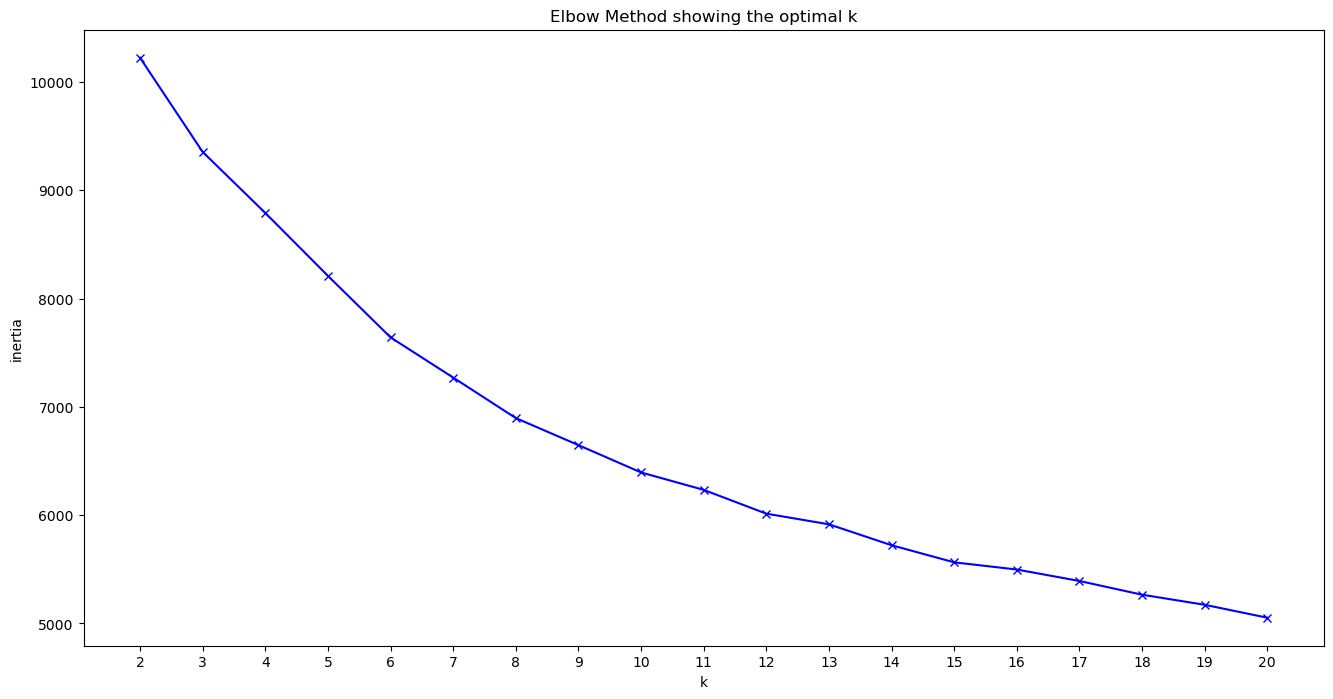

In [43]:
#themore cluster we have, we will have smaller inertia
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [44]:
#There seems to be an elbow at k=6

In [45]:
#silhouette prove that the kluster is 6, Silhouette defines observations are in correct kluster or not 
#and it is the difference of how much observation is similar to the kluster and how much it is similar 
#to other kluster and when Silhouette is bigger it means that the observations is very Similar to their 
#own kluster -->  k=6

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

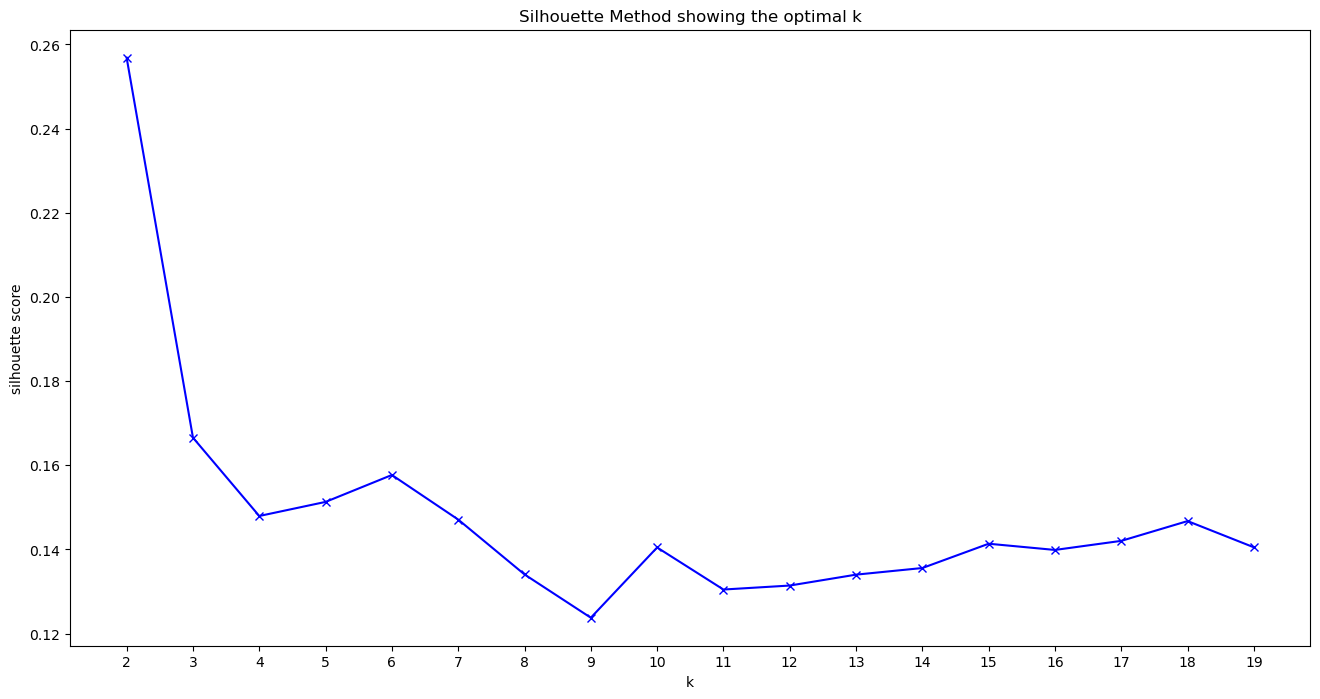

In [46]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [47]:
#now we can come back and start with 6 clusters

In [48]:
n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)

kmeans.fit(X_scaled)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12, random_state=1234)

In [49]:
#we label our clusters 
labels = kmeans.labels_
labels

array([11,  2,  3, ..., 11,  4,  4], dtype=int32)

In [50]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [51]:
#we predicted the clusters for our observations
clusters = kmeans.predict(X_scaled_df)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [52]:
#we can see how many observation we have in each kluster
pd.Series(clusters).value_counts().sort_index()

0      41
1      74
2      70
3     137
4     134
5      63
6     129
7     101
8      87
9     124
10     10
11    102
Name: count, dtype: int64

In [53]:
clusters

array([11,  2,  3, ..., 11,  4,  4], dtype=int32)

In [54]:
#X_df = pd.DataFrame(X), we created a column name clusters in df and separated our df in 3 clusters and seted 
#labels to our df

X['clusters'] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,197333,4,11
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,218093,4,2
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,184061,4,3
3,0.708,0.737,1,-4.045,1,0.0436,0.07390,0.001620,0.0955,0.607,91.986,197920,4,4
4,0.327,0.941,1,-3.294,1,0.3530,0.02310,0.000000,0.0636,0.707,129.738,199236,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.650,0.736,6,-5.840,0,0.2290,0.05280,0.000000,0.2350,0.613,159.173,226160,4,0
1068,0.605,0.822,0,-4.833,1,0.0438,0.00671,0.134000,0.1470,0.288,167.997,187147,4,4
1069,0.664,0.733,7,-5.408,1,0.0582,0.24900,0.000000,0.3090,0.403,110.110,149227,4,11
1070,0.822,0.739,1,-4.541,0,0.0311,0.02640,0.000043,0.1810,0.745,118.992,241933,4,4


In [55]:
#we got the sample to check the model
X[X['clusters']==2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
619,0.591,0.768,9,-7.587,1,0.132,0.011,0.000005,0.479,0.297,129.936,155077,3,2


In [56]:
#calculating the inertia or sum of distances of each observation from their centroid of cluster
kmeans.inertia_

6014.183521337701

In [57]:
#Finally we saved the traind model with pickle and we dump model in to pickles
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [58]:
#with this function we can load our pickle
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [59]:
scaler= load(filename="scaler.pickle")

In [60]:
kmeans_model = load(filename="kmeans_4.pickle")

In [61]:
kmeans_model

KMeans(n_clusters=12, random_state=1234)

In [62]:
scaler2 = load("scaler.pickle")

In [63]:
# 2. find url and store it in a variable
# 3. download html with a get request 

url = 'https://www.billboard.com/charts/hot-100/'
response = requests.get(url)
soup = BeautifulSoup(response.content)
hiss = soup.select('h3.c-title.a-font-primary-bold-l')

In [64]:
soup.select('li.o-chart-results-list__item h3.c-title')

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Texas Hold 'Em		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Lovin On Me		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Lose Control		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-lette

In [65]:
#list of best songs 
songs = []
for song in soup.select('li.o-chart-results-list__item h3.c-title#title-of-a-story'):
    title = song.get_text().strip()
    songs.append(title)
songs

["Texas Hold 'Em",
 'Lovin On Me',
 'Lose Control',
 'Carnival',
 'Beautiful Things',
 'Snooze',
 'Cruel Summer',
 'Greedy',
 'I Remember Everything',
 'Agora Hills',
 'Yes, And?',
 'Stick Season',
 'Fast Car',
 'Water',
 'Last Night',
 'Redrum',
 "Thinkin' Bout Me",
 "Is It Over Now? (Taylor's Version) [From The Vault]",
 'Pretty Little Poison',
 'Flowers',
 'Paint The Town Red',
 'Houdini',
 'Made For Me',
 'Never Lose Me',
 'La Diabla',
 'Where The Wild Things Are',
 'Training Season',
 'The Painter',
 'Feather',
 'What Was I Made For?',
 'Rich Baby Daddy',
 'Whatever She Wants',
 'Truck Bed',
 'Selfish',
 'Everybody',
 'Vampire',
 'Wild Ones',
 'On My Mama',
 'Praise Jah In The Moonlight',
 'Save Me',
 'Exes',
 'Breathe',
 'Dance The Night',
 'Need A Favor',
 'Surround Sound',
 'World On Fire',
 'Yeah!',
 'Burn It Down',
 'Good Good',
 'La Victima',
 'End Of Beginning',
 'Get In With Me',
 'Burn',
 'Man Made A Bar',
 '16 Carriages',
 'First Person Shooter',
 'Fuk Sumn',
 'One Of Th

In [66]:
len(songs)

100

In [67]:
#list of artists for best songs
artists = []
for artist in soup.select('li.o-chart-results-list__item span.c-label.a-no-trucate'):
    name = artist.get_text().strip()
    artists.append(name)
artists

['Beyonce',
 'Jack Harlow',
 'Teddy Swims',
 '¥$: Kanye West & Ty Dolla $ign Featuring Rich The Kid & Playboi Carti',
 'Benson Boone',
 'SZA',
 'Taylor Swift',
 'Tate McRae',
 'Zach Bryan Featuring Kacey Musgraves',
 'Doja Cat',
 'Ariana Grande',
 'Noah Kahan',
 'Luke Combs',
 'Tyla',
 'Morgan Wallen',
 '21 Savage',
 'Morgan Wallen',
 'Taylor Swift',
 'Warren Zeiders',
 'Miley Cyrus',
 'Doja Cat',
 'Dua Lipa',
 'Muni Long',
 'Flo Milli',
 'Xavi',
 'Luke Combs',
 'Dua Lipa',
 'Cody Johnson',
 'Sabrina Carpenter',
 'Billie Eilish',
 'Drake Featuring Sexyy Red & SZA',
 'Bryson Tiller',
 'HARDY',
 'Justin Timberlake',
 'Nicki Minaj Featuring Lil Uzi Vert',
 'Olivia Rodrigo',
 'Jessie Murph & Jelly Roll',
 'Victoria Monet',
 'YG Marley',
 'Jelly Roll With Lainey Wilson',
 'Tate McRae',
 'Yeat',
 'Dua Lipa',
 'Jelly Roll',
 'JID Featuring 21 Savage & Baby Tate',
 'Nate Smith',
 'Usher Featuring Lil Jon & Ludacris',
 'Parker McCollum',
 'Usher, Summer Walker & 21 Savage',
 'Xavi',
 'Djo',
 'B

In [68]:
len(artists)

100

In [69]:
best_songs = pd.DataFrame({'song':songs, 'atrist':artists})
best_songs

,song,atrist
0,Texas Hold 'Em,Beyonce
1,Lovin On Me,Jack Harlow
2,Lose Control,Teddy Swims
3,Carnival,¥$: Kanye West & Ty Dolla $ign Featuring Rich ...
4,Beautiful Things,Benson Boone
...,...,...
95,Talking,¥$: Kanye West & Ty Dolla $ign Featuring North...
96,Monaco,Bad Bunny
97,Where It Ends,Bailey Zimmerman
98,Wondering Why,The Red Clay Strays


In [70]:
best_songs.to_csv('best_songs.csv', index=False)

In [71]:
url = 'https://www.officialcharts.com/charts/official-hip-hop-and-r-and-b-singles-chart/'
response = requests.get(url)
soup = BeautifulSoup(response.content)
response.status_code

200

In [72]:
soup.select('a.chart-name')

[<a class="chart-name font-bold inline-block" href="/songs/kanye-west-ft-ty-dolla-sign-carnival/"><!-- --><span class="movement-icon movement-up"></span><span>CARNIVAL</span></a>,
 <a class="chart-name font-bold inline-block" href="/songs/jack-harlow-lovin-on-me/"><!-- --><span class="movement-icon movement-down"></span><span>LOVIN ON ME</span></a>,
 <a class="chart-name font-bold inline-block" href="/songs/sza-saturn/"><span class="movement-icon text-brand-pink new text-xs md:text-sm w-auto !-left-3 uppercase" title="New entry">New</span><!-- --><span>SATURN</span></a>,
 <a class="chart-name font-bold inline-block" href="/songs/central-cee-i-will/"><span class="movement-icon text-brand-pink new text-xs md:text-sm w-auto !-left-3 uppercase" title="New entry">New</span><!-- --><span>I WILL</span></a>,
 <a class="chart-name font-bold inline-block" href="/songs/tyla-water/"><!-- --><span class="movement-icon movement-down"></span><span>WATER</span></a>,
 <a class="chart-name font-bold inl

In [73]:
favorite_songs = []
for song in soup.select('a.chart-name'):
    favorite_songs.append(song.get_text())
favorite_songs

['CARNIVAL',
 'LOVIN ON ME',
 'NewSATURN',
 'NewI WILL',
 'WATER',
 'REDRUM',
 'NEVER LOSE ME',
 'RICH BABY DADDY',
 'NewKITCHEN STOVE',
 'SPRINTER',
 'WHATEVER SHE WANTS',
 'GREY',
 'BURN',
 'PAINT THE TOWN RED',
 'MADE FOR ME',
 'TOXIC',
 'ANGEL NUMBERS/TEN TOES',
 'SNOOZE',
 'CALM DOWN',
 'ONE DANCE',
 'SAVE YOUR TEARS',
 'RUNAWAY',
 'BLINDING LIGHTS',
 'PINK + WHITE',
 'FATHER STRETCH MY HANDS PT 1',
 'YEAH',
 'DIE FOR YOU',
 'HEAVEN OR HELL',
 'RETHINKIN BOUT YOU',
 'FEIN',
 'ONE CALL',
 'BACK TO ME',
 'OVERSEAS',
 'NO ROLE MODELZ',
 'WITHOUT ME',
 'SUNFLOWER',
 'ALL THE STARS',
 'EAGLE',
 'KILL BILL',
 'LOSE YOURSELF']

In [74]:
soup.select('a.chart-artist')

[<a class="chart-artist text-lg inline-block" href="/artist/49333/kanye-west-ft-ty-dolla-sign/"><span>KANYE WEST/<wbr>TY DOLLA SIGN</wbr></span></a>,
 <a class="chart-artist text-lg inline-block" href="/artist/57428/jack-harlow/"><span>JACK HARLOW</span></a>,
 <a class="chart-artist text-lg inline-block" href="/artist/32371/sza/"><span>SZA</span></a>,
 <a class="chart-artist text-lg inline-block" href="/artist/58226/central-cee/"><span>CENTRAL CEE</span></a>,
 <a class="chart-artist text-lg inline-block" href="/artist/tyla/"><span>TYLA</span></a>,
 <a class="chart-artist text-lg inline-block" href="/artist/50585/21-savage/"><span>21 SAVAGE</span></a>,
 <a class="chart-artist text-lg inline-block" href="/artist/flo-milli/"><span>FLO MILLI</span></a>,
 <a class="chart-artist text-lg inline-block" href="/artist/drake-ft-sexyy-red-sza/"><span>DRAKE FT SEXYY RED &amp; SZA</span></a>,
 <a class="chart-artist text-lg inline-block" href="/artist/pozer/"><span>POZER</span></a>,
 <a class="chart

In [75]:
favorite_artists = []
for artist in soup.select('a.chart-artist'):
    favorite_artists.append(artist.get_text())
favorite_artists

['KANYE WEST/TY DOLLA SIGN',
 'JACK HARLOW',
 'SZA',
 'CENTRAL CEE',
 'TYLA',
 '21 SAVAGE',
 'FLO MILLI',
 'DRAKE FT SEXYY RED & SZA',
 'POZER',
 'DAVE & CENTRAL CEE',
 'BRYSON TILLER',
 'YUNG FILLY',
 'KANYE WEST/TY DOLLA SIGN',
 'DOJA CAT',
 'MUNI LONG',
 'SONGER',
 'CHRIS BROWN',
 'SZA',
 'REMA',
 'DRAKE FT WIZKID & KYLA',
 'WEEKND',
 'KANYE WEST FT PUSHA T',
 'WEEKND',
 'FRANK OCEAN',
 'KANYE WEST',
 "USHER FT LIL' JON & LUDACRIS",
 'WEEKND',
 'K-TRAP',
 'FRANK OCEAN',
 'TRAVIS SCOTT FT PLAYBOI CARTI',
 'RICH AMIRI',
 'KANYE WEST/TY DOLLA SIGN',
 'D-BLOCK EUROPE FT CENTRAL CEE',
 'J COLE',
 'EMINEM',
 'POST MALONE FT SWAE LEE',
 'KENDRICK LAMAR & SZA',
 'D-BLOCK EUROPE & NOIZY',
 'SZA',
 'EMINEM']

In [76]:
print(len(favorite_artists), len(favorite_songs))

40 40


In [77]:
favorite_songs = pd.DataFrame({'song':favorite_songs, 'atrist':favorite_artists})
favorite_songs

,song,atrist
0,CARNIVAL,KANYE WEST/TY DOLLA SIGN
1,LOVIN ON ME,JACK HARLOW
2,NewSATURN,SZA
3,NewI WILL,CENTRAL CEE
4,WATER,TYLA
5,REDRUM,21 SAVAGE
6,NEVER LOSE ME,FLO MILLI
7,RICH BABY DADDY,DRAKE FT SEXYY RED & SZA
8,NewKITCHEN STOVE,POZER
9,SPRINTER,DAVE & CENTRAL CEE


In [78]:
favorite_songs.to_csv('favorite_songs.csv', index=False)

In [79]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [82]:
user_input = input('Enter your favorite song:').lower()

# Convert song names in the DataFrame to lowercase
best_songs['song_lower'] = best_songs['song'].str.lower()

# Use fuzzywuzzy to find the closest match
match, score, index = process.extractOne(user_input, best_songs['song_lower'])

# Set a similarity threshold (adjust as needed)
if score >= 80:
    # Filter out the user's favorite song from the DataFrame
    remaining_songs = best_songs[best_songs['song_lower'] != match]
   
    # Recommend a random song from the remaining songs
    random_song = remaining_songs.sample(n=1)['song'].values[0]
    
    print(f"Great choice! Did you mean '{match}'? You might also like '{random_song}'.")
else:
    print("You can choose from another DataFrame named 'favorite_songs'.")
    user_input_favorite_songs = input('Enter your favorite song from favorite_songs:').lower()
    # Convert song names in the DataFrame to lowercase
    favorite_songs['favorite_song_lower'] = favorite_songs['song'].str.lower()
    # Use fuzzywuzzy to find the closest match
    match, score, index = process.extractOne(user_input_favorite_songs, favorite_songs['favorite_song_lower'])
    # Set a similarity threshold (adjust as needed)
    if score >= 80:
        # Filter out the user's favorite song from the DataFrame
        remaining_favorite_songs = favorite_songs[favorite_songs['favorite_song_lower'] != match]
        # Recommend a random song from the remaining songs
        random_favorite_song = remaining_favorite_songs.sample(n=1)['song'].values[0]
        print(f"Great choice! Did you mean '{match}'? You might also like '{random_favorite_song}'.")
    else:
        # Extract track IDs
        # Search for the song
        results = sp.search(q=user_input, type='track')
        # Extract the ID of the first result
        if results['tracks']['items']:
            song_id = results['tracks']['items'][0]['id']
            # Get audio features
            id_ = results["tracks"]["items"][0]["id"]
            user_af = sp.audio_features(id_ )
            
            # Create a new list of dictionaries, each excluding specified keys
            columns_to_exclude = ['type', 'uri', 'track_href', 'analysis_url','id']

            # Create a new list of dictionaries, each excluding specified keys
            filtered_user_af_list = [{key: value for key, value in song.items() if key not in columns_to_exclude} for song in user_af]
            user_df = pd.DataFrame([{key: value for key, value in song.items() if key not in columns_to_exclude} for song in user_af])
            
            scaler= load(filename="scaler.pickle")
            user_scaled = scaler.transform(user_df)
            
            kmeans_model = load(filename="kmeans_4.pickle")
    
               

                # Recommend a song based on clustering
            user_cluster = kmeans_model.predict(user_scaled)[0]
    
                # Filter DataFrame based on the same cluster as the user's input song
            similar_song = X[X['clusters'] == user_cluster].sample().sample(n=1)
            
            #accessing the id of similar_song that we have in final_df but we dont have in X
            similar_song_id = final_df.loc[similar_song.index, 'id'].item()
            
            print(f"Similar song to your entered song is:")
            display(play_song(similar_song_id))
               
        else:
            print(f"No results found for the song '{user_input}'.")


Enter your favorite song:Skyfall
You can choose from another DataFrame named 'favorite_songs'.
Enter your favorite song from favorite_songs:Skyfall
Similar song to your entered song is:
